In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import pickle

In [2]:
df = pd.read_csv('/content/train.csv')

### Dataset Overview

In [3]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
# Описова статистика для всіх нечислових колонок
# Кількість унікальних значень, найпоширеніше значення, частота найпоширенішого значення
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


### Data Preprocessing

Formatting column names, adjusting column values, updating data types, dropping unnecessary columns, handling missing values, and checking for any duplicate data

In [4]:
# Detection of duplicate values
if (len(df[df.duplicated()]) > 0):
    print("Duplicates found")
else:
    print("Duplicates not found")

Duplicates not found


In [5]:
# Format Column Names
df.rename(columns={'Time_Orderd': 'Time_Ordered',
                   'Weatherconditions': 'Weather_conditions'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Ordered                 45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather_conditions           45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
# Extract Column Value
df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: x.split(" ")[1].strip())

In [7]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,Fog,Jam,1,Meal,scooter,1,No,Metropolitian,40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46


In [8]:
# Drop unnecessary columns
df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [9]:
# Update Data Types
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
df['Time_taken(min)'] = df['Time_taken(min)'].astype('int64')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43739 non-null  float64       
 1   Delivery_person_Ratings      43685 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Ordered                 45593 non-null  object        
 8   Time_Order_picked            45593 non-null  object        
 9   Weather_conditions           45593 non-null  object        
 10  Road_traffic_density         45593 non-null  object        
 11  Vehicle_condition            45593 non-nu

In [10]:
# Handle Missing Values
df.replace('NaN', np.nan, regex=True, inplace=True)
df.isnull().sum()

,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Ordered,1731
Time_Order_picked,0
Weather_conditions,616


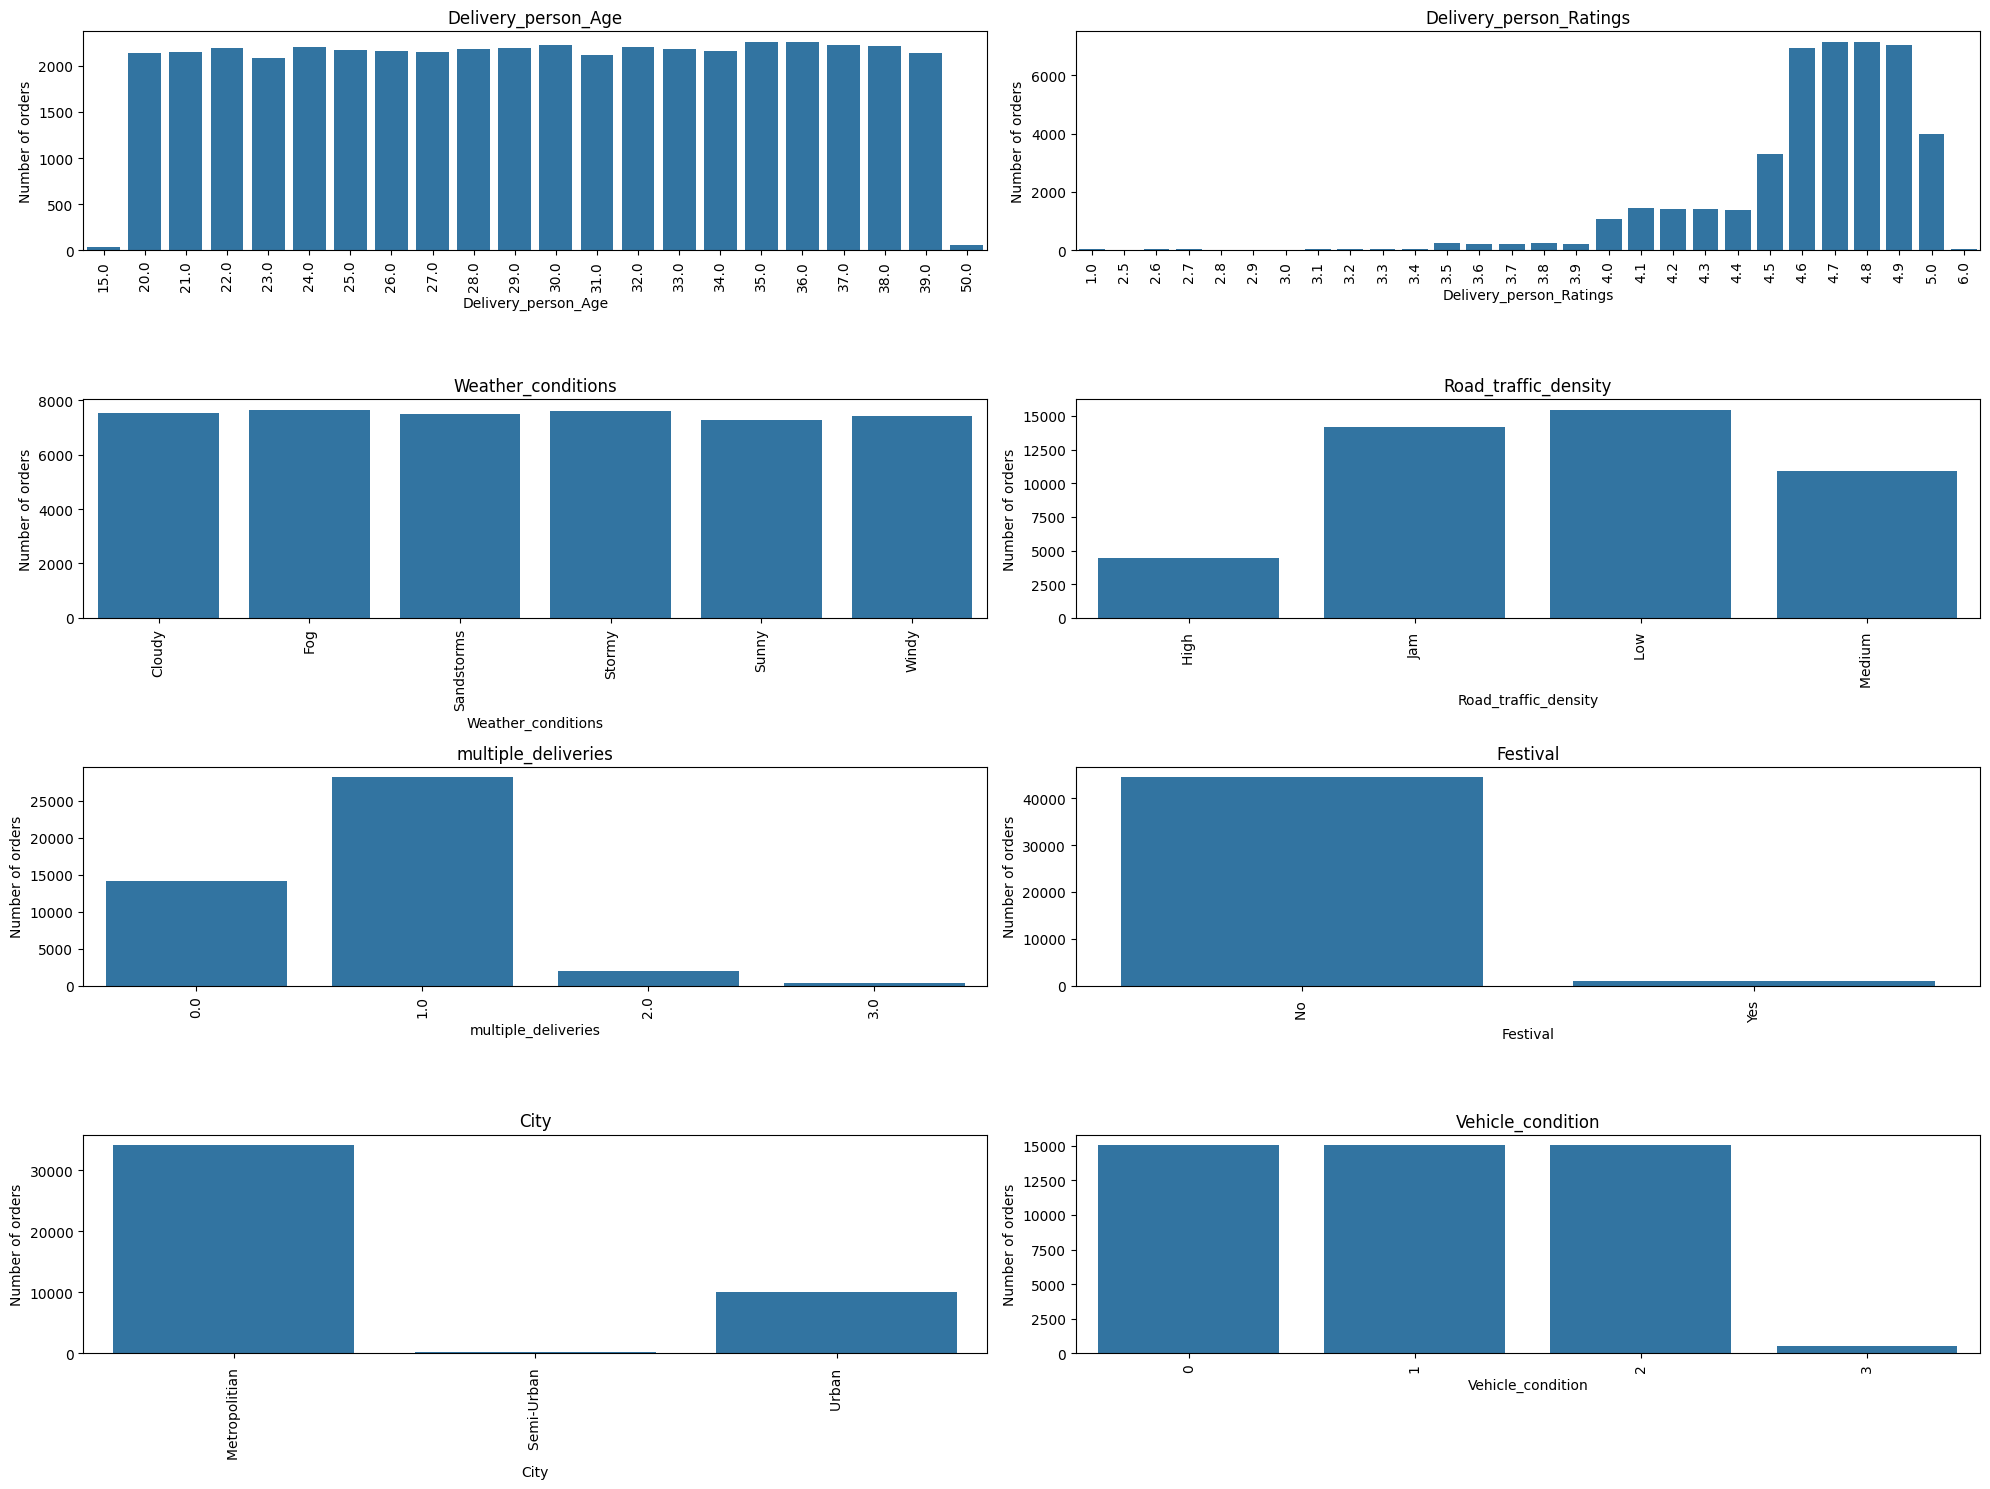

In [11]:
#Data Visualisation
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City', 'Vehicle_condition']

num_plots = len(cols)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.countplot(
        data=df,
        x=column_name,
        order=df[column_name].value_counts().sort_index().index,
        ax=ax
    )

    ax.set_ylabel('Number of orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Delivery_person_Age
random_ages = df['Delivery_person_Age'].dropna().sample(n=df['Delivery_person_Age'].isna().sum(), replace=True).values # Генерація випадкових значень з існуючих даних
df.loc[df['Delivery_person_Age'].isna(), 'Delivery_person_Age'] = random_ages # Заповнення пропущених значень випадковими значеннями

# Weather_conditions
random_cond = df['Weather_conditions'].dropna().sample(n=df['Weather_conditions'].isna().sum(), replace=True).values # Генерація випадкових значень з існуючих даних
df.loc[df['Weather_conditions'].isna(), 'Weather_conditions'] = random_cond # Заповнення пропущених значень випадковими значеннями

# Delivery_person_Ratings
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True) # Filled with median value

# Road_traffic_density
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True) # mode (most frequent value)

# multiple_deliveries
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True) # mode (most frequent value)

# Festival
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True) # mode (most frequent value)

# City
df['City'].fillna(df['City'].mode()[0], inplace=True)

In [13]:
df = df.dropna(subset=['Time_Ordered'])

In [ ]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Ordered,0
Time_Order_picked,0
Weather_conditions,0


In [14]:
# converting to a timedelta format
df['Time_Ordered'] = pd.to_timedelta(df['Time_Ordered'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

In [15]:
# categorizes a given time (as a Timedelta) into parts of the day
def get_time_of_day(time):
    if time < pd.Timedelta(hours=6):
        return 'Night'
    elif time < pd.Timedelta(hours=12):
        return 'Morning'
    elif time < pd.Timedelta(hours=18):
        return 'Afternoon'
    else:
        return 'Evening'

In [16]:
df = df.assign(
    Time_of_Day = lambda x: x['Time_Ordered'].apply(get_time_of_day),
    Order_day_of_week = df.Order_Date.dt.day_of_week.astype(int),
    Order_is_weekend = lambda x: np.where(x['Order_day_of_week'].isin([5, 6]), 1, 0)
)


In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_of_Day,Order_day_of_week,Order_is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,Sunny,...,2,Snack,motorcycle,0.0,No,Urban,24,Morning,5,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,Stormy,...,2,Snack,scooter,1.0,No,Metropolitian,33,Evening,4,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,Sandstorms,...,0,Drinks,motorcycle,1.0,No,Urban,26,Morning,5,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,Sunny,...,0,Buffet,motorcycle,1.0,No,Metropolitian,21,Evening,1,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,Cloudy,...,1,Snack,scooter,1.0,No,Metropolitian,30,Afternoon,5,1


In [ ]:
 # Форматування часу замовлення
df['Date_Time_Ordered'] = df['Order_Date'] + df['Time_Ordered']

# Корекція дати для часу, коли замовлення було забрано після півночі
df['Date_Time_Order_picked'] = df['Order_Date'] + df['Time_Order_picked']
df.loc[df['Time_Order_picked'] < df['Time_Ordered'], 'Date_Time_Order_picked'] += pd.DateOffset(days=1)

# Обчислення часу підготовки замовлення
df['order_prepare_time'] = (df['Date_Time_Order_picked'] - df['Date_Time_Ordered']).dt.total_seconds() / 60

# Заповнення пропусків медіанним значенням
df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

# Видалення проміжних колонок
df.drop(['Time_Ordered', 'Time_Order_picked', 'Date_Time_Ordered', 'Date_Time_Order_picked', 'Order_Date'], axis=1, inplace=True)

In [ ]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_of_Day,Order_day_of_week,Order_is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,Morning,5,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,Evening,4,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,Morning,5,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,Evening,1,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,Afternoon,5,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,Morning,3,0,10.0
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,Evening,2,0,15.0
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,Evening,4,0,15.0
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,Afternoon,0,0,5.0


In [18]:
# calculates the geodesic distance (the shortest distance between two points on the Earth's surface) between the restaurant and the delivery location
df['geodesic_distance_km'] = df.apply(lambda row: round(geodesic((row['Restaurant_latitude'], row['Restaurant_longitude']),
                                                           (row['Delivery_location_latitude'], row['Delivery_location_longitude'])).kilometers, 2), axis=1)

In [19]:
# drop unnecessary columns
df.drop(['Restaurant_latitude', 'Restaurant_longitude',
        'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1, inplace=True)

In [ ]:
df

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_of_Day,Order_day_of_week,Order_is_weekend,order_prepare_time,geodesic_distance_km
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,Morning,5,1,15.0,3.02
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,Evening,4,0,5.0,20.14
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,Morning,5,1,15.0,1.55
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,Evening,1,0,10.0,7.77
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,Afternoon,5,1,15.0,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,Morning,3,0,10.0,1.49
45589,21.0,4.6,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,Evening,2,0,15.0,10.98
45590,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,Evening,4,0,15.0,4.65
45591,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,Afternoon,0,0,5.0,6.22


In [20]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.str.strip())

In [21]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoders = {}

    for col in categorical_columns:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        label_encoders[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    return label_encoders

# Виклик функції
encodings = label_encoding(df)

In [22]:
encodings

{'Weather_conditions': {'Cloudy': 0,
  'Fog': 1,
  'Sandstorms': 2,
  'Stormy': 3,
  'Sunny': 4,
  'Windy': 5},
 'Road_traffic_density': {'High': 0, 'Jam': 1, 'Low': 2, 'Medium': 3},
 'Type_of_order': {'Buffet': 0, 'Drinks': 1, 'Meal': 2, 'Snack': 3},
 'Type_of_vehicle': {'electric_scooter': 0, 'motorcycle': 1, 'scooter': 2},
 'Festival': {'No': 0, 'Yes': 1},
 'City': {'Metropolitian': 0, 'Semi-Urban': 1, 'Urban': 2},
 'Time_of_Day': {'Afternoon': 0, 'Evening': 1, 'Morning': 2, 'Night': 3}}

In [ ]:
# Збереження енкодерів у файл
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encodings, file)

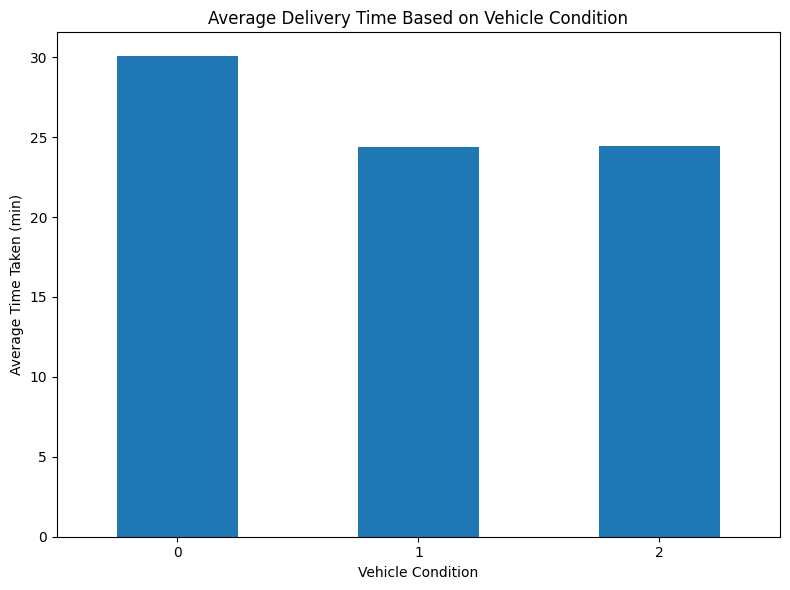

In [ ]:
vehicle_condition_group = df.groupby('Vehicle_condition')['Time_taken(min)'].mean()

# Plot the result
plt.figure(figsize=(8, 6))
vehicle_condition_group.plot(kind='bar')
plt.title('Average Delivery Time Based on Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## Model training

In [46]:
X = df.drop('Time_taken(min)', axis=1)  # Features
y = df['Time_taken(min)']  # Target variable

In [55]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35089, 15)
(35089,)
(8773, 15)
(8773,)


In [57]:
# Create a StandardScaler object
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Збереження скейлера в файл
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [62]:
models = [
  LinearRegression(),
  DecisionTreeRegressor(),
  RandomForestRegressor(),
  xgb.XGBRegressor(),
]

param_grid = [
   {},
   {'max_depth': [3, 5, 7]},
   {'n_estimators': [100, 200, 300]},
  {'n_estimators': [10, 15, 20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.460023296733625

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.740580947440326

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.8300470910701572

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 20}
Best R2 score: 0.8372046470642089



In [63]:
model = xgb.XGBRegressor(n_estimators=20,max_depth=7)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 2.98
Mean Squared Error (MSE): 13.8
Root Mean Squared Error (RMSE): 3.71
R-squared (R2) Score: 0.84


In [33]:
pickle.dump(model, open('xgb_model1', "wb"))